## Data Cleaning 

#### Import all important libraries 

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_data_df = pd.read_csv('Downloads/weatherHistory.csv')
weather_data_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
# Datatypes of the dataframe
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [4]:
# Statistical details of the dataframe
weather_data_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [5]:
# Checking null value present in dataset or not
weather_data_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
weather_data_df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [7]:
weather_data_df.shape

(96453, 11)

In [8]:
weather_data_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

Observation:

1. In 'Precip Type' there are 517 missing values.
2. 'Wind Bearing' has only integer values and formatted Date is in string.
3. Minimum values of Humidity, Wind Speed (km/h) , Wind Bearing (degrees) , Visibility (km), Pressure are Zero and they can be Zero.

In [9]:
# Changing formatted date from String to Datetime
weather_data_df['Formatted Date']= pd.to_datetime(weather_data_df['Formatted Date'], utc = True)
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  int64              
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

In [10]:
# Set Formatted Date column as index
weather_data_df=weather_data_df.set_index("Formatted Date")
weather_data_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


In [11]:
#Resampling of data 
weather_data_df_column = ['Apparent Temperature (C)','Humidity']
weather_data_df_monthly_mean = weather_data_df[weather_data_df_column].resample("MS").mean()  #MS-Month Start
weather_data_df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


"MS" denotes Month Starting. We are displaying the average apparent temperature and humidity using mean() function.

## Exploratory Data Analysis

###### Given,
The Null Hypothesis H0 is " Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".

The Alternative Hypothesis H1 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming ".



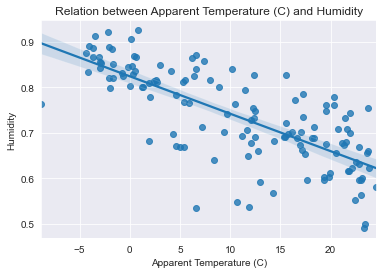

In [12]:
#Relation between Apparent Temperature (C) and Humidity

sns.set_style("darkgrid")
sns.regplot(data=weather_data_df_monthly_mean , x="Apparent Temperature (C)",y="Humidity")
plt.title("Relation between Apparent Temperature (C) and Humidity")
#save the figure 
plt.savefig('plot1.png' , dpi=300 , bbox_inches='tight')
plt.show()

###### Observation :  
There might be a linear relationship between "Apparent Temperature (C)" and "Humidity" with negative slope.

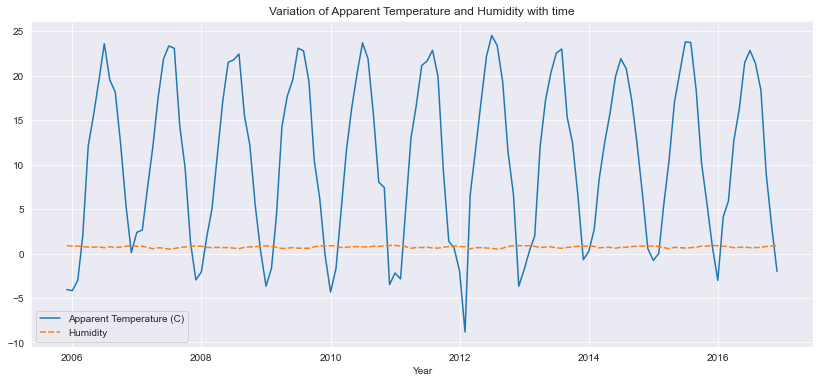

In [13]:
plt.figure(figsize=(14,6))
sns.lineplot(data = weather_data_df_monthly_mean)
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time")
#save the figure 
plt.savefig('plot2.png',dpi=300 , bbox_inches='tight')
plt.show()

#### Observation:
1. "Humidity" remained constant from 2006-2016
2. "Apparent Temperature (C)" frequently changed from 2006-2016

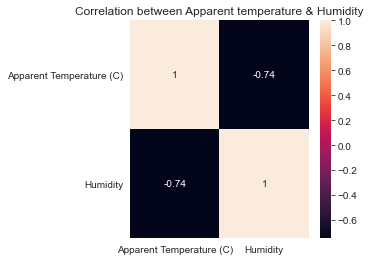

In [14]:
# Pair plot for correlation of Apparent temperature & Humidity 

sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data=weather_data_df_monthly_mean.corr(), annot = True)

#save the figure 
plt.savefig('plot3.png',dpi=300 , bbox_inches='tight')
plt.show()

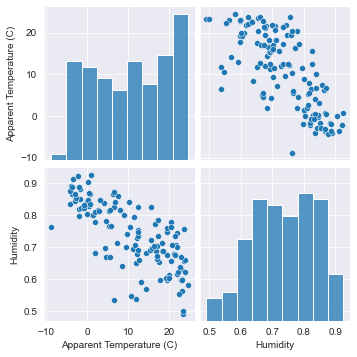

In [15]:
sns.pairplot(weather_data_df_monthly_mean,kind = 'scatter')
#save the figure
plt.savefig('plot4.png',dpi=300 , bbox_inches='tight')
plt.show()

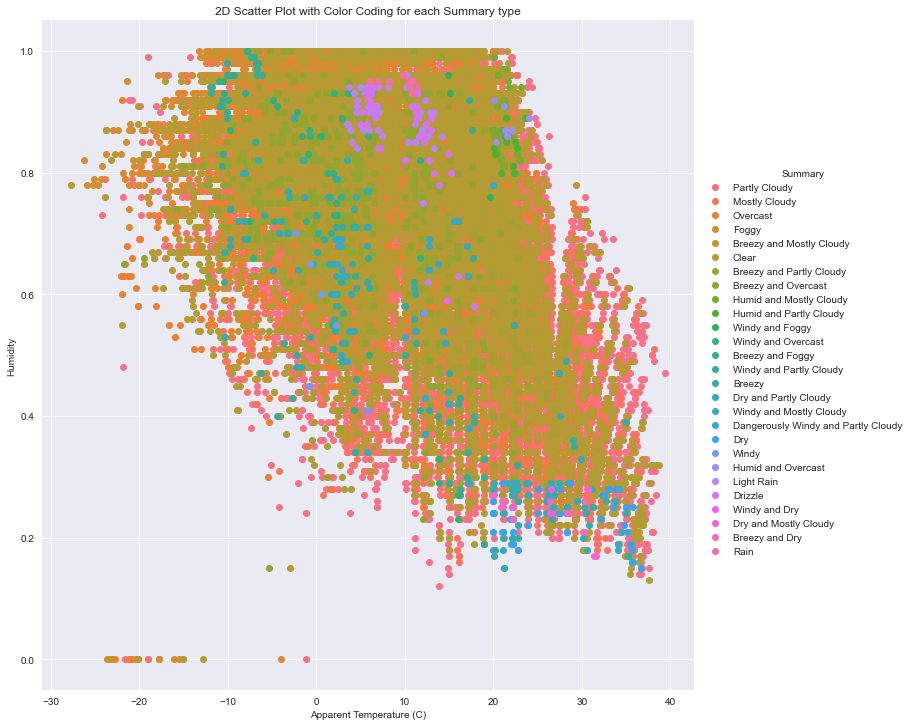

In [16]:
# 2D Scatter plot with color coding for each Summary type 

sns.set_style("darkgrid")
sns.FacetGrid(weather_data_df, hue="Summary", height=10).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.title("2D Scatter Plot with Color Coding for each Summary type")
# save the figure
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
plt.show()

###### Observation:

   1. There are very few outlier.
   2. Mostly Weather is Clear or Partly Cloudy/Rain in Finland.
   3. Only few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.

#### Univariate Analysis

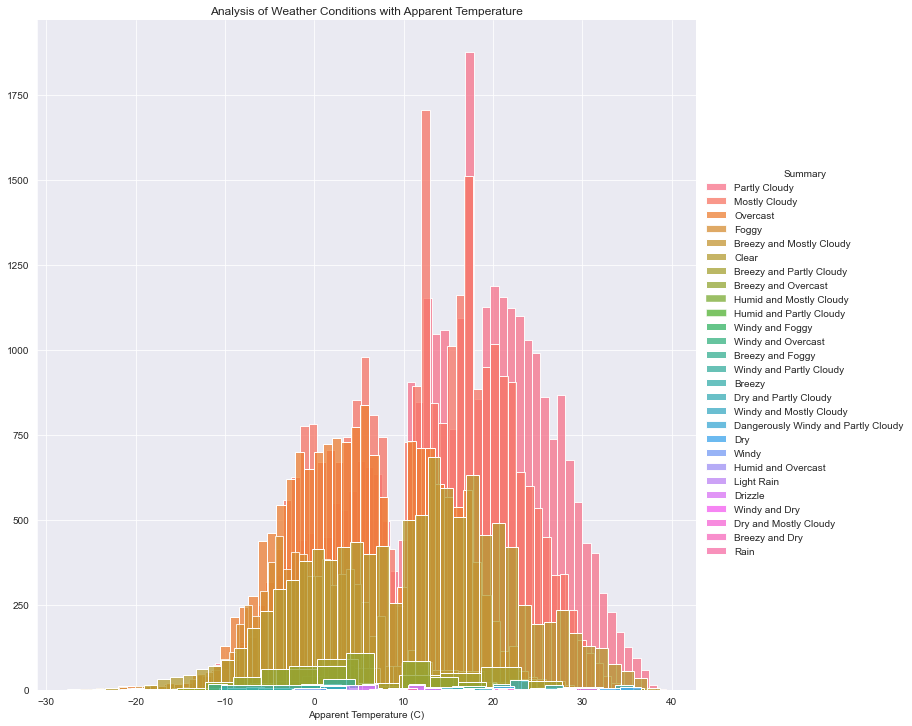

In [17]:
# For Apparent Temperature (C)
sns.set_style("darkgrid")
sns.FacetGrid(weather_data_df, hue="Summary", height=10).map(sns.histplot, "Apparent Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Apparent Temperature")
# save the figure
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')
plt.show()

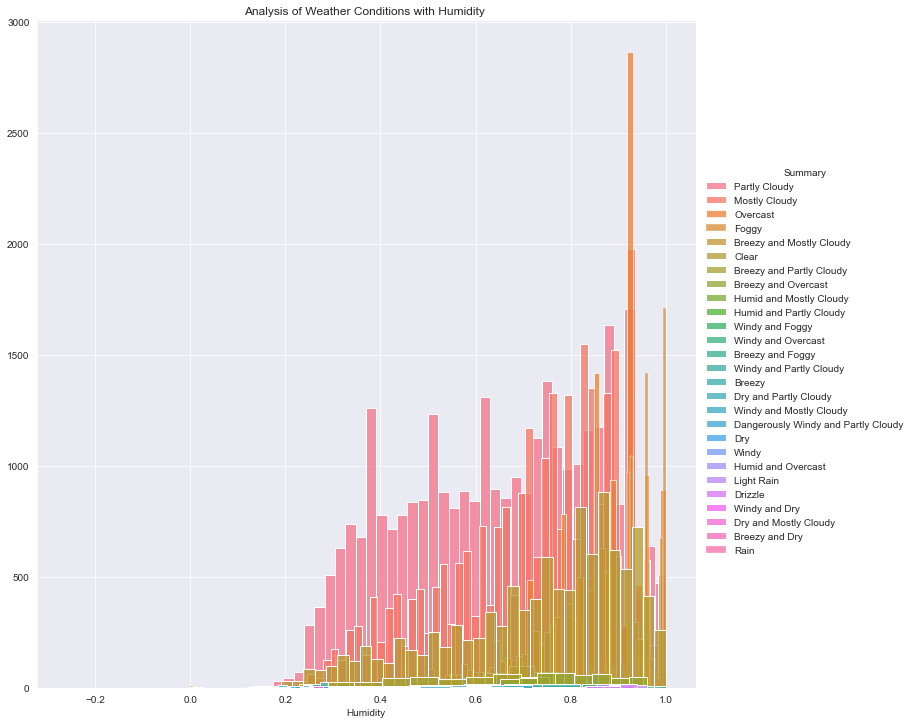

In [18]:
# For Humidity
sns.set_style("darkgrid")
sns.FacetGrid(weather_data_df, hue="Summary", height=10).map(sns.histplot, "Humidity").add_legend()
plt.title("Analysis of Weather Conditions with Humidity ")
# save the figure
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()

##### Observation: 
"Humidity" is better Feature than "Apparent Temperature (C)"

#### Function for plotting Humidity & Apparent Temperature for all months

In [19]:
# Function for plotting Humidity & Apparent Temperature for all month

Temp_data = weather_data_df_monthly_mean.iloc[:,0]
Hum_data = weather_data_df_monthly_mean.iloc[:,1]

def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','yellow'
    elif month == 4:
        return 'April','orange'
    elif month == 5:
        return 'May','darkblue'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','red'
    elif month == 8:
        return 'August','pink'
    elif month == 9 :
        return 'September','purple'
    elif month == 10:
        return 'October','violet'
    elif month == 11:
        return 'November','brown'
    elif month == 12:
        return 'December','black'
def plot_month(month, weather_data_df):
    label, color = label_color(month)
    mdata = weather_data_df[weather_data_df.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, weather_data_df):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,weather_data_df)
    #plt.savefig('plot8.png', dpi=300, bbox_inches='tight') 
    plt.savefig('plot9.png', dpi=300, bbox_inches='tight')  
    plt.show()

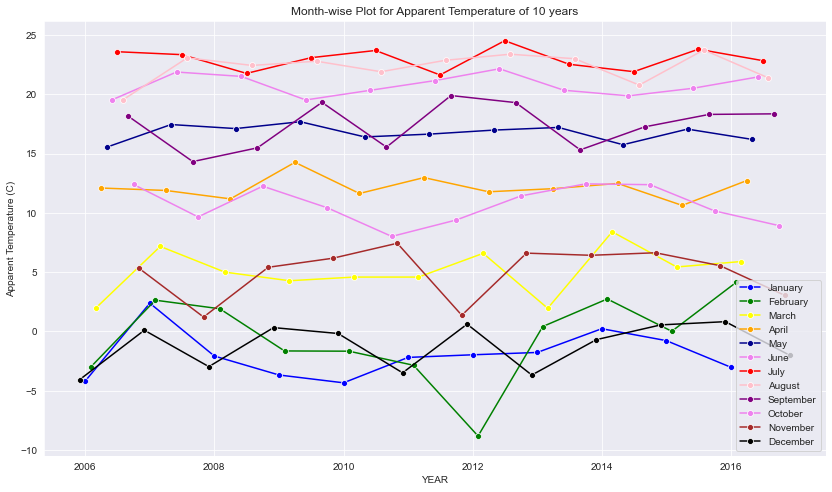

In [20]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, Temp_data)



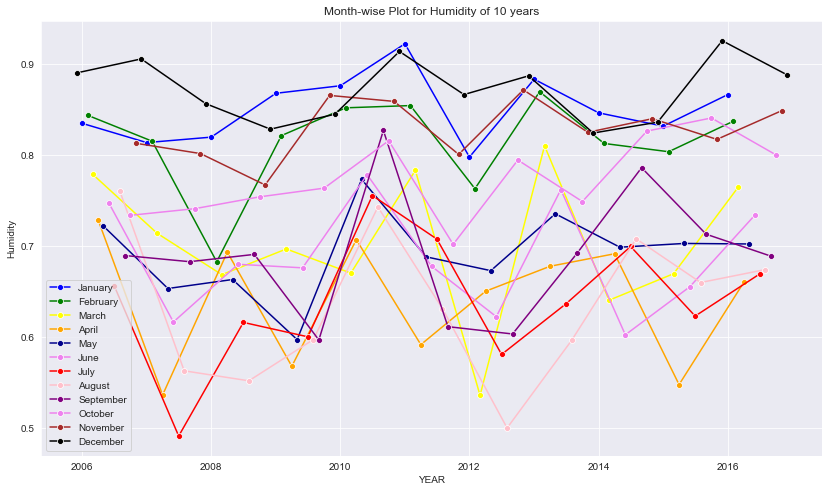

In [21]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, Hum_data)

#### Function for plotting Apparent Temperature and Humidity for each month 

In [22]:
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = weather_data_df_monthly_mean[weather_data_df_monthly_mean.index.month == month]
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')  
    plt.show()
    print('-'*80)

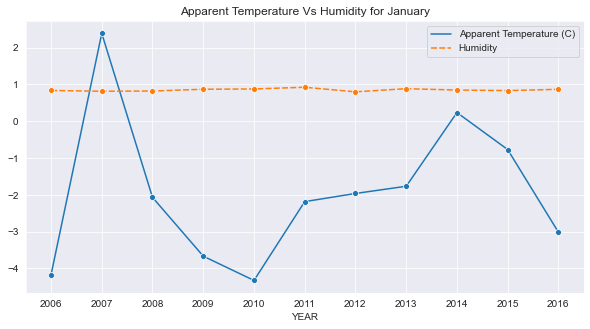

--------------------------------------------------------------------------------


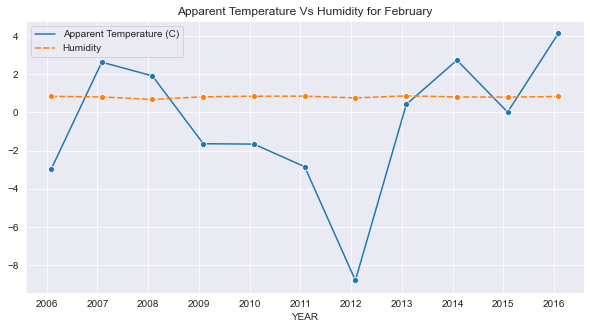

--------------------------------------------------------------------------------


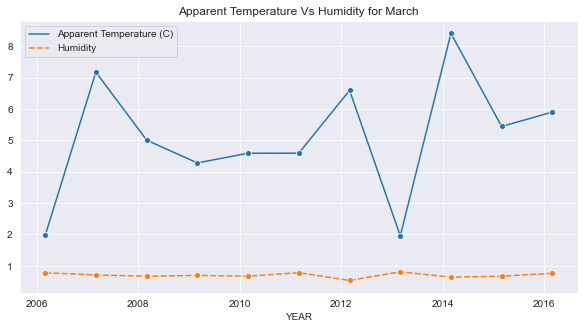

--------------------------------------------------------------------------------


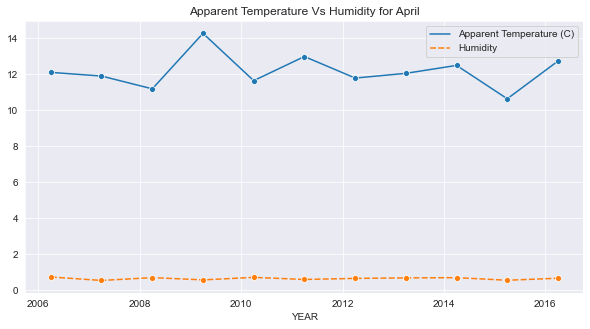

--------------------------------------------------------------------------------


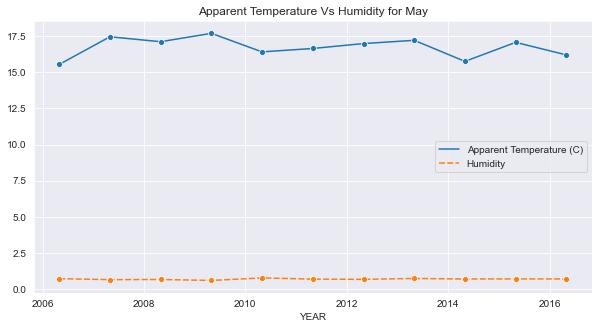

--------------------------------------------------------------------------------


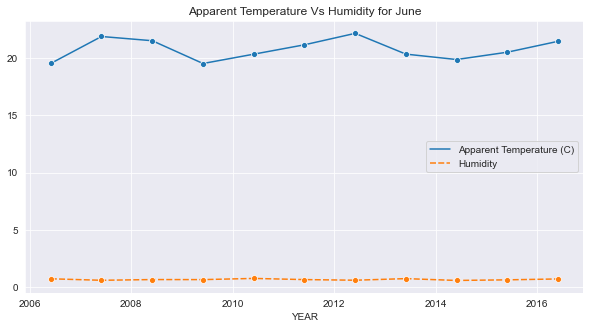

--------------------------------------------------------------------------------


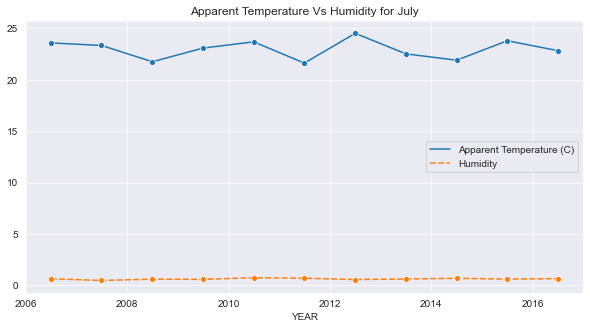

--------------------------------------------------------------------------------


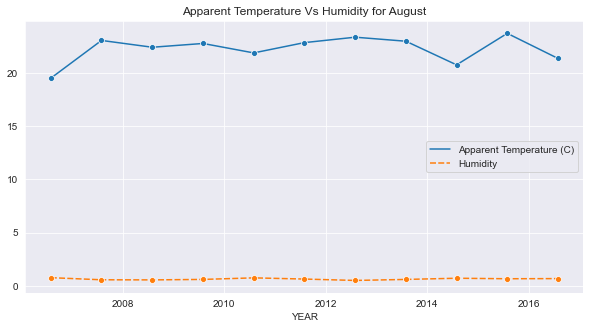

--------------------------------------------------------------------------------


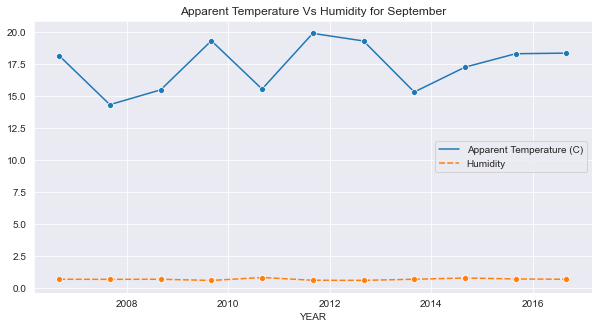

--------------------------------------------------------------------------------


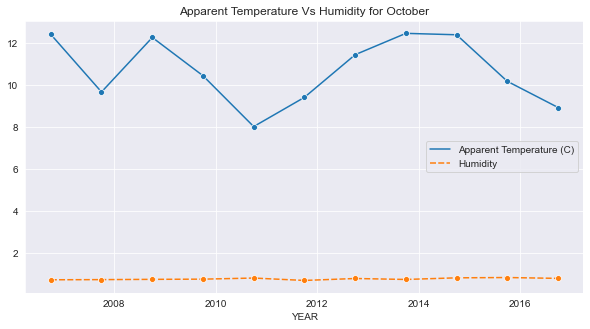

--------------------------------------------------------------------------------


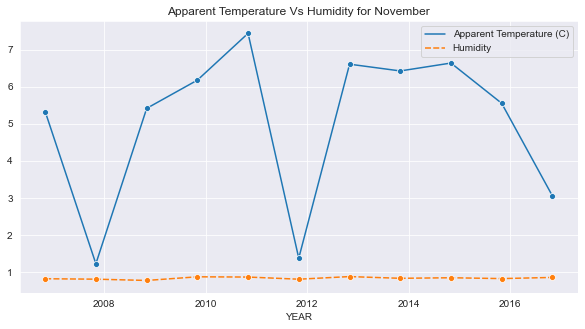

--------------------------------------------------------------------------------


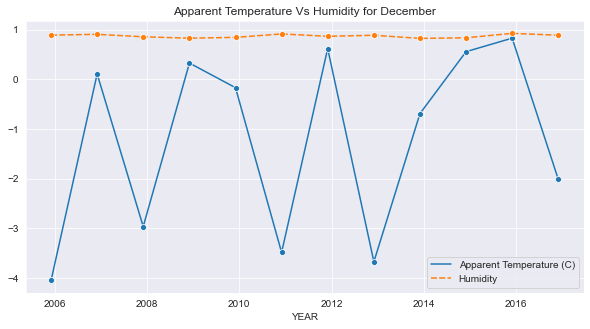

--------------------------------------------------------------------------------


In [23]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

In [25]:
import scipy.stats as stats

In [26]:
a= weather_data_df_monthly_mean['Apparent Temperature (C)']
b= weather_data_df_monthly_mean['Humidity']
test = stats.ttest_rel(a,b)
pvalue = test[1]
print(pvalue)

6.686806829267691e-24


In [27]:
if pvalue>0.05:
    print("Accept Null Hypothesis")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis


Conclusion :
    As we can see in the above images,there are many ups and downs in the temperature and the average humidity has
    remained constant throughout the 10 years . According to Jan-Dec graph visualization , april to august month's 
    temperature change is very less. So, We can conclude that global warming has caused an uncertainty in the 
    temperature over the past 10 years.